In [1]:
# TITLE

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json, time
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [3]:
# datasets

who_latest = "datasets/WHO_18_03_2020.csv"
dimensions_latest = "datasets/Dimensions_18_03_2020.csv"

df_who = pd.read_csv(who_latest)
df_dimensions = pd.read_csv(dimensions_latest)

In [4]:
# clean DOIs

def clean_doi(d):
    if isinstance(d,str):
        d = d.replace("https://doi.org/","")
        d = d.replace("doi:","")
        return d
    return d

In [5]:
df_who["DOI"] = df_who["DOI"].apply(clean_doi)
df_dimensions["DOI"] = df_dimensions["DOI"].apply(clean_doi)

In [6]:
df_who.head()

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags
0,Platelet-to-lymphocyte ratio is associated wit...,"Qu, Rong; Ling, Yun; Zhang, Yi-Huizhi; Wei, Li...","INTRODUCTION: SinceDecember 2019, novelcoronav...",2020.0,NaN,Journal of medical virology,NaN,NaN,NaN,NaN,10.1002/jmv.25767,9121,#8973,Qu 2020,NaN,* Case study/series; * Opinion piece; Clinical...
1,Epidemiologic and Clinical Characteristics of ...,"Qian, Guo-Qing; Yang, Nai-Bin; Ding, Feng; Ma,...",BACKGROUND: Recent studies have focused initia...,2020.0,NaN,QJM : monthly journal of the Association of Ph...,NaN,NaN,NaN,NaN,10.1093/qjmed/hcaa089,9120,#9128,Qian 2020,NaN,* Epidemiological study; * Opinion piece; Epid...
2,Correlation between travellers departing from ...,"Ping Zhong, M. D. Songxue Guo M. D. Ting Chen ...",Highlight We found a strong correlation betwee...,2020.0,NaN,Journal of Travel Medicine,NaN,NaN,NaN,NaN,NaN,9099,#9222,PingZhong 2020,NaN,* Epidemiological study; * Opinion piece; Epid...
3,On the front lines of coronavirus: the Italian...,"Paterlini, Marta",Italy has rapidly become the country hit secon...,2020.0,NaN,BMJ,368,NaN,m1065-m1065,NaN,10.1136/bmj.m1065,9119,#8989,Paterlini 2020,NaN,"* Opinion piece; Epidemiology; Ethics, social ..."
4,Coronavirus cases have dropped sharply in Sout...,"Normile, Dennis",Europe is now the epicenter of the COVID-19 pa...,2020.0,NaN,Science,NaN,NaN,NaN,NaN,10.1126/science.abb7566,9620,#9246,Normile 2020,NaN,* Opinion piece; Epidemiology; Infection preve...


In [7]:
df_dimensions.head()

,Date added,Publication ID,DOI,PMID,PMCID,Title,Abstract,Source title,Source UID,Publisher,...,Research Organizations - standardized,GRID IDs,City of Research organization,Country of Research organization,Funder,UIDs of supporting grants,Times cited,Altmetric,Source Linkout,Dimensions URL
0,2020-03-16,pub.1125672140,10.5812/iji.102184,NaN,NaN,COVID-19: The New Threat,NaN,International Journal of Infection,jour.1051749,Kowsar Medical Institute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://app.dimensions.ai/details/publication/...
1,2020-03-16,pub.1125670218,10.1515/cclm-2020-0188,NaN,NaN,Prominent changes in blood coagulation of pati...,Abstract Background As the number of patients...,Clinical Chemistry and Laboratory Medicine,jour.1294896,De Gruyter,...,NaN,NaN,NaN,NaN,National Natural Science Foundation of China,grant.8360207,NaN,2.0,NaN,https://app.dimensions.ai/details/publication/...
2,2020-03-16,pub.1125671401,10.3348/kjr.2020.0163,NaN,NaN,What Is Needed to Make Interventional Radiolog...,NaN,Korean Journal of Radiology,jour.1023226,The Korean Society of Radiology (KAMJE),...,National University of Singapore; Tan Tock Sen...,grid.4280.e; grid.240988.f,Singapore; Singapore,Singapore; Singapore,NaN,NaN,NaN,NaN,NaN,https://app.dimensions.ai/details/publication/...
3,2020-03-16,pub.1125671336,10.32598/jpr.8.2.139,NaN,NaN,COVID-19 Infection in Iranian Children: A Case...,NaN,Journal of Pediatrics Review,jour.1154967,Negah Scientific Publisher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://app.dimensions.ai/details/publication/...
4,2020-03-16,pub.1125671402,10.3348/kjr.2020.0164,NaN,NaN,Computed Tomographic Findings in COVID-19,NaN,Korean Journal of Radiology,jour.1023226,The Korean Society of Radiology (KAMJE),...,Hainan Medical University,grid.443397.e,Haikou,China,NaN,NaN,NaN,NaN,NaN,https://app.dimensions.ai/details/publication/...


In [8]:
# check DOIs
print("WHO")
print(df_who.shape)
print(df_who[pd.notna(df_who["DOI"])].shape)

print("Dimensions")
print(df_dimensions.shape)
print(df_dimensions[pd.notna(df_dimensions["DOI"])].shape)

WHO
(2048, 16)
(1699, 16)
Dimensions
(2956, 31)
(2888, 31)


In [9]:
df_join = df_dimensions.join(df_who.set_index("DOI"), how='inner', on="DOI", lsuffix='dimensions', rsuffix='who')

In [10]:
df_join = df_join[pd.notna(df_join["DOI"])]

In [11]:
df_join.shape

(1021, 46)

In [12]:
df_join.head()

,Date added,Publication ID,DOI,PMID,PMCID,Titledimensions,Abstractdimensions,Source title,Source UID,Publisher,...,Journal,Volumewho,Issuewho,Pages,Accession Number,Ref,Covidence #,Study,Notes,Tags
1,2020-03-16,pub.1125670218,10.1515/cclm-2020-0188,NaN,NaN,Prominent changes in blood coagulation of pati...,Abstract Background As the number of patients...,Clinical Chemistry and Laboratory Medicine,jour.1294896,De Gruyter,...,Clinical chemistry and laboratory medicine,NaN,NaN,NaN,NaN,8928,#8776,Han 2020,NaN,"* Case study/series; Clinical aspects, diagnos..."
2,2020-03-16,pub.1125671401,10.3348/kjr.2020.0163,NaN,NaN,What Is Needed to Make Interventional Radiolog...,NaN,Korean Journal of Radiology,jour.1023226,The Korean Society of Radiology (KAMJE),...,Korean journal of radiology,NaN,NaN,NaN,NaN,8907,#8694,Pua 2020,NaN,* Case study/series; Infection prevention and ...
4,2020-03-16,pub.1125671402,10.3348/kjr.2020.0164,NaN,NaN,Computed Tomographic Findings in COVID-19,NaN,Korean Journal of Radiology,jour.1023226,The Korean Society of Radiology (KAMJE),...,NaN,NaN,NaN,NaN,NaN,8906,#8757,Joob 2020,NaN,"* Opinion piece; Clinical aspects, diagnosis, ..."
6,2020-03-16,pub.1125670220,10.1515/cclm-2020-0285,NaN,NaN,Potential preanalytical and analytical vulnera...,Abstract A novel zoonotic coronavirus outbreak...,Clinical Chemistry and Laboratory Medicine,jour.1294896,De Gruyter,...,Clinical chemistry and laboratory medicine,NaN,NaN,NaN,NaN,8926,#8733,Lippi 2020,NaN,"* Narrative review; Clinical aspects, diagnosi..."
7,2020-03-16,pub.1125671400,10.3348/kjr.2020.0157,NaN,NaN,Evolution of Computed Tomography Manifestation...,NaN,Korean Journal of Radiology,jour.1023226,The Korean Society of Radiology (KAMJE),...,Korean journal of radiology,NaN,NaN,NaN,NaN,8908,#8673,Sun 2020,NaN,"* Case study/series; Clinical aspects, diagnos..."


In [13]:
who_dois = df_who[pd.notnull(df_who["DOI"])]["DOI"].tolist()
dimensions_dois = df_dimensions[pd.notnull(df_dimensions["DOI"])]["DOI"].tolist()
dimensions_pmids = df_dimensions[(pd.notnull(df_dimensions["PMID"])) & ~(pd.notnull(df_dimensions["DOI"]))]["PMID"].tolist()

In [14]:
len(set(dimensions_dois).intersection(set(who_dois)))

950

In [15]:
all_dois = list(set(dimensions_dois).union(set(who_dois)))

In [16]:
print(len(all_dois))

3533


In [17]:
extra_pmids = list(set(dimensions_pmids))

In [18]:
print(len(extra_pmids))

17


In [19]:
# load Scite data

In [62]:
scite_folder = "datasets/Scite_COVID_Dimensions"

df_covid = pd.read_csv(os.path.join(scite_folder,"covid.csv"))
df_sources = pd.read_csv(os.path.join(scite_folder,"covid-source-tallies.csv"))
df_targets = pd.read_csv(os.path.join(scite_folder,"covid-target-tallies.csv"))
print(df_sources.shape)
print(df_targets.shape)

(1572, 6)
(19601, 6)


In [63]:
df_sources.drop_duplicates(subset="doi", keep = False, inplace = True)
df_targets.drop_duplicates(subset="doi", keep = False, inplace = True)
print(df_sources.shape)
print(df_targets.shape)

(21, 6)
(8236, 6)


In [37]:
df_covid.head()

,id,source_doi,target_doi,text,pos,neg,neu,section,last_classification,source,...,section_multiple,expert_classification,pdf_location,kala_version,veracity_version,ref_location,type,type_confidence,self_cite,veracity_error
0,1639571555,10.1111/pcn.12988,10.1016/s0140-6736(15)61106-0,"On 30 January 2020, the World Health Organizat...",0.019156,0.027197,1.000000,NaN,1584485152,scitecovid19,...,NaN,NaN,"[{""h"": ""5.31"", ""w"": ""4.97"", ""x"": ""211.29"", ""y""...",v5.2.0-46-gd59b0d3,v1.4.0-53-g20b1b11,b6/1,mentioning,1.000000,NaN,NaN
1,1639574281,10.3389/fchem.2019.00923,10.1002/anie.201005995,"In addition, reactive side chains on the amino...",0.004103,0.007224,1.000000,USP18 ACTIVITY ASSAYS,1584485166,scitecovid19,...,"[""USP18 ACTIVITY ASSAYS""]",NaN,"[{""h"": ""89.81"", ""w"": ""9.18"", ""x"": ""456.71"", ""y...",v5.2.0-46-gd59b0d3,v1.4.0-53-g20b1b11,b17/1,mentioning,1.000000,NaN,NaN
2,1639571556,10.1111/pcn.12988,10.1093/geronb/54b.2.p85,"On 30 January 2020, the World Health Organizat...",0.017559,0.027814,1.000000,NaN,1584485152,scitecovid19,...,NaN,NaN,"[{""h"": ""2.66"", ""w"": ""4.97"", ""x"": ""216.61"", ""y""...",v5.2.0-46-gd59b0d3,v1.4.0-53-g20b1b11,b7/1,mentioning,1.000000,NaN,NaN
3,1639572625,10.1101/2020.02.07.939207,10.1146/annurev-virology-110615-042301,The S2 domain encodes the stalk of the spike p...,0.006251,0.004513,1.000000,NaN,1584485159,scitecovid19,...,NaN,NaN,"[{""h"": ""4.39"", ""w"": ""7.04"", ""x"": ""448.84"", ""y""...",v5.2.0-46-gd59b0d3,v1.4.0-53-g20b1b11,b3/1,mentioning,1.000000,NaN,NaN
4,1639573736,10.2807/1560-7917.es.2020.25.4.2000058,10.1093/aje/kwr122,"estimated <cite data-doi=""10.1093/aje/kwr122"">...",0.072607,0.068639,0.957213,Comparison with past emergences of respiratory...,1584485166,scitecovid19,...,"[""Comparison with past emergences of respirato...",NaN,"[{""h"": ""14.75"", ""w"": ""10.46"", ""x"": ""89.17"", ""y...",v5.2.0-46-gd59b0d3,v1.4.0-53-g20b1b11,b13/1,mentioning,0.957213,NaN,NaN


In [38]:
df_sources.head()

,doi,total,supporting,contradicting,mentioning,unclassified
50,10.1101/2020.02.09.20021477,6,0,0,6,0
53,10.1101/2020.02.21.20026328,2,0,0,2,0
195,10.1001/jama.2020.3413,1,0,0,1,0
202,10.1016/s2468-2667(20)30030-x,1,0,0,1,0
367,10.1101/2020.02.22.20025460,1,0,0,1,0


In [39]:
df_targets.head()

,doi,total,supporting,contradicting,mentioning,unclassified
0,10.1016/s0140-6736(15)61106-0,42,0,0,42,0
1,10.1002/anie.201005995,68,0,0,68,0
2,10.1093/geronb/54b.2.p85,31,2,0,29,0
6,10.1016/j.bmc.2007.07.016,13,0,0,13,0
12,10.1038/s41579-018-0020-5,13,0,0,13,0


In [40]:
df_sources.describe()

,total,supporting,contradicting,mentioning,unclassified
count,21.000000,21.000000,21.0,21.000000,21.0
mean,4.523810,0.095238,0.0,4.428571,0.0
std,7.332251,0.436436,0.0,7.352356,0.0
min,1.000000,0.000000,0.0,1.000000,0.0
25%,1.000000,0.000000,0.0,1.000000,0.0
50%,2.000000,0.000000,0.0,2.000000,0.0
75%,4.000000,0.000000,0.0,4.000000,0.0
max,34.000000,2.000000,0.0,34.000000,0.0


In [41]:
df_targets.describe()

,total,supporting,contradicting,mentioning,unclassified
count,8236.000000,8236.000000,8236.000000,8236.000000,8236.000000
mean,157.537518,3.039825,0.341064,154.156508,0.000121
std,1001.071243,8.182845,1.126970,997.181355,0.011019
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,6.000000,0.000000
50%,22.000000,1.000000,0.000000,21.000000,0.000000
75%,77.000000,3.000000,0.000000,74.000000,0.000000
max,64900.000000,158.000000,29.000000,64809.000000,1.000000


In [44]:
df_sources.sort_values("supporting", ascending=False).head(20)

,doi,total,supporting,contradicting,mentioning,unclassified
1530,10.1148/radiol.2020200280,4,2,0,2,0
50,10.1101/2020.02.09.20021477,6,0,0,6,0
1207,10.1016/s0140-6736(20)30185-9,12,0,0,12,0
1560,10.1007/s00330-020-06731-x,1,0,0,1,0
1538,10.1093/jtm/taaa020,1,0,0,1,0
1529,10.1056/nejmc2001468,34,0,0,34,0
1448,10.1016/s0140-6736(20)30304-4,2,0,0,2,0
1413,10.1148/radiol.2020200343,8,0,0,8,0
1381,10.1001/jama.2020.2131,3,0,0,3,0
1208,10.1038/s41591-020-0771-1,2,0,0,2,0


In [46]:
df_targets.sort_values("supporting", ascending=False).head(20)

,doi,total,supporting,contradicting,mentioning,unclassified
5176,10.1080/10705519909540118,15183,158,11,15014,0
11974,10.1056/nejmoa0906695,1056,142,29,885,0
13435,10.1016/j.cell.2006.07.024,10609,130,6,10473,0
8361,10.1073/pnas.0530291100,5589,123,11,5455,0
19340,10.1016/j.cell.2009.01.002,9317,113,9,9195,0
13869,10.1016/j.stem.2008.07.003,2113,109,3,2001,0
15987,10.1073/pnas.0506580102,11888,107,2,11779,0
16137,10.1111/j.0887-378x.2004.00325.x,3524,105,3,3416,0
13851,10.1038/nature05236,3207,103,8,3096,0
4053,10.1126/science.1260419,2011,98,2,1911,0


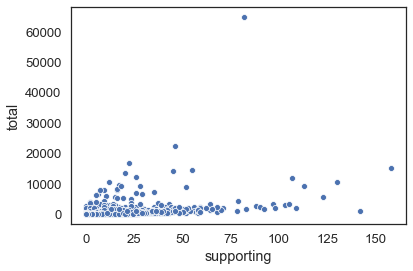

In [47]:
sns.scatterplot("supporting","total",data=df_targets)

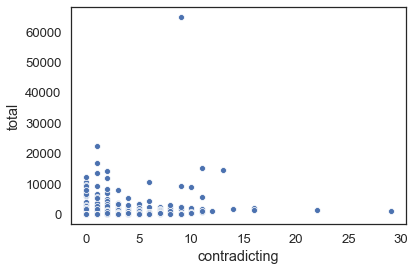

In [48]:
sns.scatterplot("contradicting","total",data=df_targets)

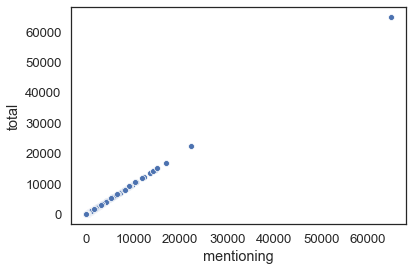

In [49]:
sns.scatterplot("mentioning","total",data=df_targets)

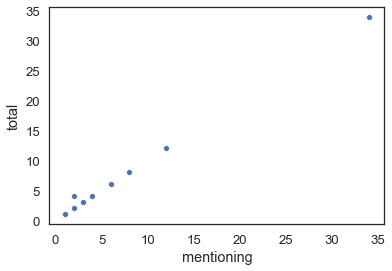

In [53]:
sns.scatterplot("mentioning","total",data=df_sources)

### Index of support

In [ ]:
# For each source, calculate a vector of supporting - contradicting - mentioning - total cited publications

In [58]:
len(set(df_sources.doi.tolist()).intersection(set(df_covid.source_doi.tolist())))/len(set(df_sources.doi.tolist()))

1.0

In [60]:
for source in df_sources.doi.tolist():
    # get cited
    targets = list(set(df_covid[df_covid.source_doi == source].target_doi.tolist()))
    print(len(targets))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [61]:
df_sources.doi.tolist()

['10.1101/2020.02.09.20021477',
 '10.1101/2020.02.21.20026328',
 '10.1001/jama.2020.3413',
 '10.1016/s2468-2667(20)30030-x',
 '10.1101/2020.02.22.20025460',
 '10.1002/jmv.25708',
 '10.1016/j.jhin.2020.01.019',
 '10.1101/2020.02.03.20019497',
 '10.1148/radiol.2020200432',
 '10.2807/1560-7917.es.2020.25.4.2000057',
 '10.1148/ryct.2020200026',
 '10.1016/s0140-6736(20)30185-9',
 '10.1038/s41591-020-0771-1',
 '10.1001/jama.2020.2131',
 '10.1148/radiol.2020200343',
 '10.1016/s0140-6736(20)30304-4',
 '10.1056/nejmc2001468',
 '10.1148/radiol.2020200280',
 '10.1093/jtm/taaa020',
 '10.1007/s00330-020-06731-x',
 '10.1093/jtm/taaa011']